# 1. Headfiles

In [2]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt

# 2. Ordinary Regression

========== iteration 300 =========
Learned params:
coef:0.0022
bias: 0.1908
acceleration of gravity(m/s^2): g = 9.0284


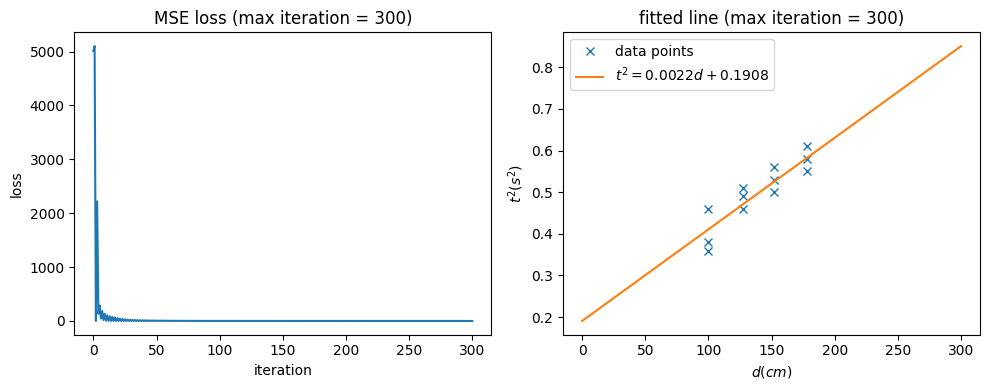

========== iteration 500 =========
Learned params:
coef:0.0022
bias: 0.1895
acceleration of gravity(m/s^2): g = 8.9931


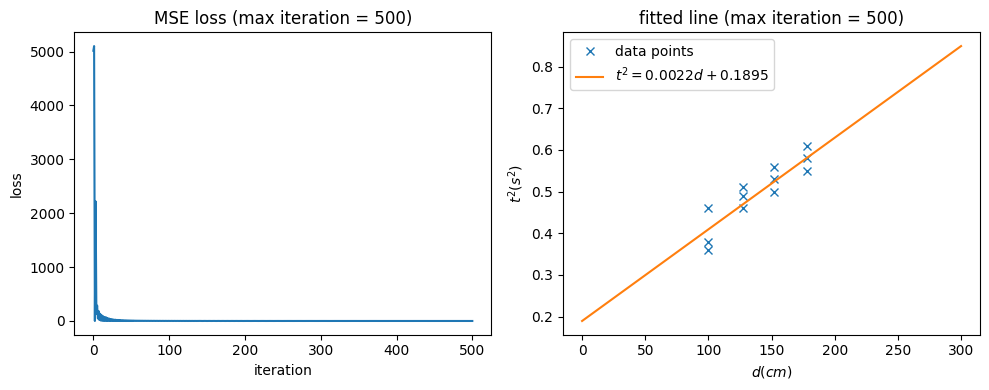

========== iteration 1000 =========
Learned params:
coef:0.0022
bias: 0.187
acceleration of gravity(m/s^2): g = 8.9204


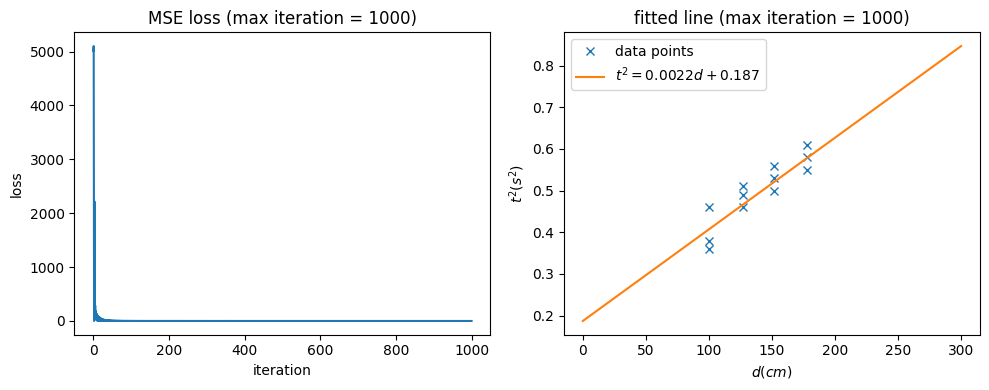

========== iteration 2000 =========
Learned params:
coef:0.0023
bias: 0.185
acceleration of gravity(m/s^2): g = 8.8652


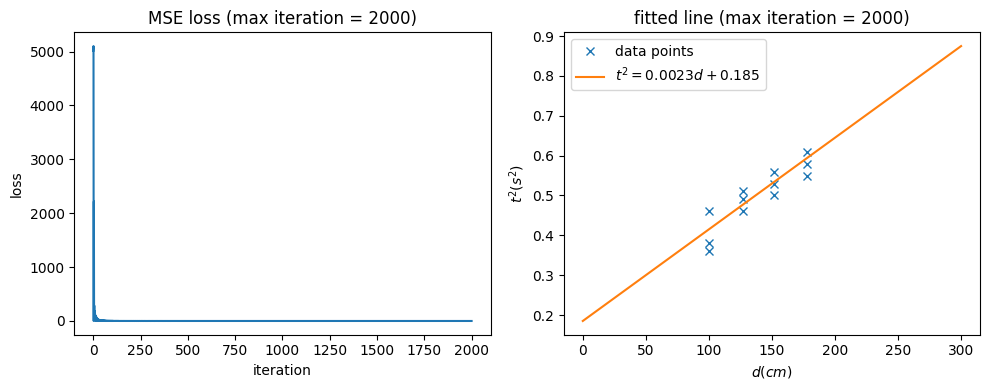

========== iteration 3000 =========
Learned params:
coef:0.0023
bias: 0.1849
acceleration of gravity(m/s^2): g = 8.8625


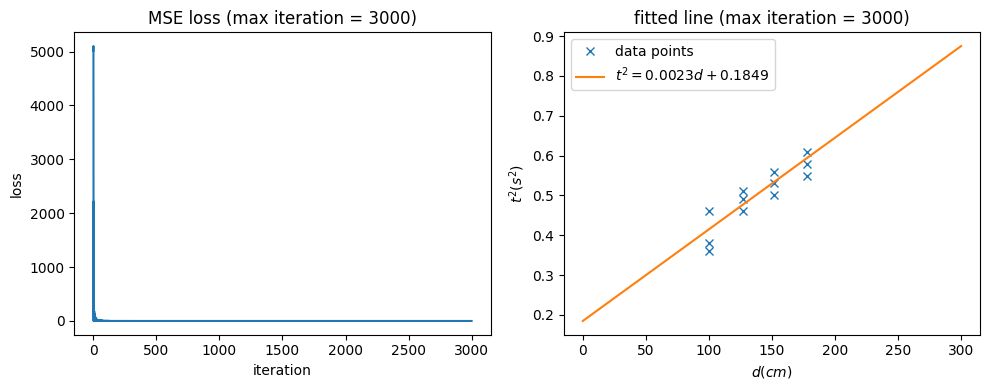

In [13]:
seed = 32
# define model
def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

# mse (mean square error)
def mse(w, x, y):
    # loop to compute cost contribution from each input-output pair
    cost = np.sum((model(x, w) - y) ** 2)
    return cost / float(y.size)

def c(t):
    return mse(t, x, y)

# gradient descent function
def gradient_descent(g, step, max_its, w, p):
    # compute gradient
    gradient = grad(g)

    # gradient descent loop
    weight_history = [w]
    cost_history = [g(w)]

    for k in range(max_its):
        # evaluate gradient
        grad_eval = gradient(w)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)

        # take gradient step
        if step == 'd':  # diminishing step
            alpha = 1 / (k + 1)
        else:            # constant step
            alpha = step
        w = w - alpha * grad_eval_norm

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))

    return weight_history, cost_history

# create data set and test
x = np.array([[
    100, 100, 100, 127, 127, 127,
    152, 152, 152, 178, 178, 178
]])
y = np.array([[
    0.36, 0.38, 0.46, 0.46, 0.49, 0.51,
    0.50, 0.53, 0.56, 0.55, 0.58, 0.61
]])


# initialization
w = np.array([[0.2], [0.5]])

its_list = [300, 500, 1000, 2000, 3000]

for max_its in its_list:
    print(f"========== iteration {max_its} =========")
    a, b = gradient_descent(c, 'd', max_its, w, 0)
    coef = a[max_its][1]
    g = 2 / coef / 100
    bias = a[max_its][0]
    g = round(g.item(), 4)
    coef = round(coef.item(), 4)
    bias = round(bias.item(), 4)
    
    # print learned weights
    print("Learned params:")
    print(f"coef:{coef}")
    print(f"bias: {bias}")
    print(fr"acceleration of gravity(m/s^2): g = {g}")
    # plot
    fig, axes = plt.subplots(1,2, figsize=(10,4))
    # plot cost history
    axes[0].plot(b)
    axes[0].set_title(f'MSE loss (max iteration = {max_its})')
    axes[0].set_xlabel('iteration')
    axes[0].set_ylabel('loss')
    
    # plot original data points
    axes[1].plot(x.T, y.T, 'x', label=f'data points')
    # plot fitted line
    axes[1].set_title(f'fitted line (max iteration = {max_its})')
    axes[1].set_xlabel(r'$d(cm)$')
    axes[1].set_ylabel(r'$t^2 (s^2)$')
    xp = np.linspace(0, 300, 1000)
    axes[1].plot(xp, bias + coef * xp, label=fr'$t^2={coef}d+{bias}$')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()